# Import Libraries

In [0]:
%tensorflow_version 2.x

In [3]:
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f'Tensorflow version: {tf.__version__}')
print(f'Tensorglow Hub version: {hub.__version__}')

Tensorflow version: 2.2.0
Tensorglow Hub version: 0.8.0


# Loading Model

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

# Loading Laybels

In [8]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.tct',
'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

16384/10484 [==============================================] - 0s 1us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

# Loading Image

In [11]:
from google.colab import files
uploaded = files.upload()

Saving office.jpg to office.jpg


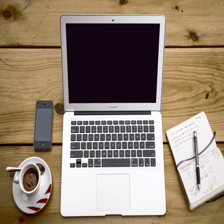

In [12]:
filename = list(uploaded.keys())[0]
img= Image.open(filename).resize(IMAGE_SHAPE)
img

# Prediction based on the model

In [13]:
img_arr = np.array(img) /255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

'notebook'

# Display prediction

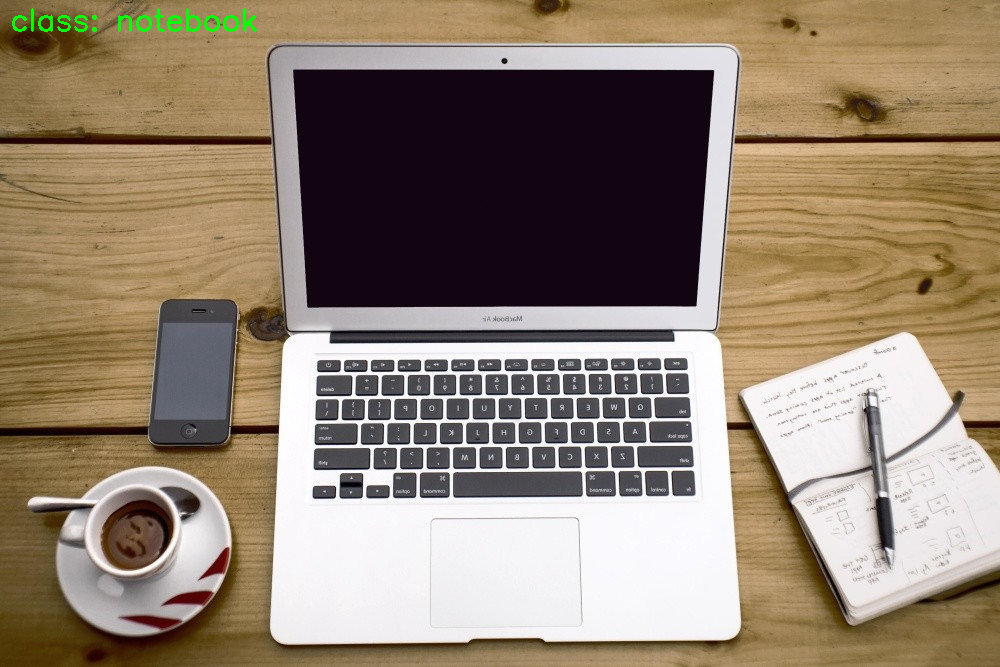

In [14]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10,30),
                  fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                  color=(0,255,0), thickness = 2)
cv2_imshow(img)